In [3]:
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.linear_model import Perceptron


In [4]:
data_dir = "./../"
data = pd.read_excel(data_dir + "corona_tested_individuals_subset_ver_00132.xlsx")

In [32]:
data

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication,sixty_above,male
0,2021-09-02,0,0,0,0,0,Positive,No,Female,Other,0.0,0.0
1,2021-09-02,0,0,0,0,0,Positive,No,Female,Other,0.0,0.0
2,2021-09-02,0,0,0,0,0,Negative,No,Female,Other,0.0,0.0
3,2021-09-02,0,0,0,0,0,Negative,No,Male,Other,0.0,1.0
4,2021-09-02,0,0,0,0,0,Positive,No,Male,Other,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
224725,2021-08-22,1,1,0,0,0,Negative,No,Male,Contact with confirmed,0.0,1.0
224726,2021-08-22,1,0,0,0,0,Negative,No,Female,Other,0.0,0.0
224727,2021-08-22,0,0,0,0,0,Negative,No,Female,Other,0.0,0.0
224728,2021-08-22,0,0,0,0,0,Positive,No,Male,Contact with confirmed,0.0,1.0


In [33]:
data.loc[data['corona_result'] == "Positive", 'result'] = 1
data.loc[data['corona_result'] == "Negative", 'result'] = 0

In [34]:
data.loc[data['age_60_and_above'] == "Yes", 'sixty_above'] = 1
data.loc[data['age_60_and_above'] == "No", 'sixty_above'] = 0

In [35]:
data.loc[data['gender'] == "Male", 'male'] = 1
data.loc[data['gender'] == "Female", 'male'] = 0

In [36]:
data1 = data.drop(["corona_result", "age_60_and_above", "gender", "test_indication", "test_date"], axis = 1)

In [37]:
data1

,cough,fever,sore_throat,shortness_of_breath,head_ache,sixty_above,male,result
0,0,0,0,0,0,0.0,0.0,1.0
1,0,0,0,0,0,0.0,0.0,1.0
2,0,0,0,0,0,0.0,0.0,0.0
3,0,0,0,0,0,0.0,1.0,0.0
4,0,0,0,0,0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...
224725,1,1,0,0,0,0.0,1.0,0.0
224726,1,0,0,0,0,0.0,0.0,0.0
224727,0,0,0,0,0,0.0,0.0,0.0
224728,0,0,0,0,0,0.0,1.0,1.0


In [38]:
data1.dropna(axis=0, inplace = True)

In [39]:
label = data1["result"]

In [40]:
label

0         1.0
1         1.0
2         0.0
3         0.0
4         1.0
         ... 
224725    0.0
224726    0.0
224727    0.0
224728    1.0
224729    1.0
Name: result, Length: 186082, dtype: float64

In [41]:
data1.drop("result", axis=1, inplace = True)

In [42]:
data1

,cough,fever,sore_throat,shortness_of_breath,head_ache,sixty_above,male
0,0,0,0,0,0,0.0,0.0
1,0,0,0,0,0,0.0,0.0
2,0,0,0,0,0,0.0,0.0
3,0,0,0,0,0,0.0,1.0
4,0,0,0,0,0,0.0,1.0
...,...,...,...,...,...,...,...
224725,1,1,0,0,0,0.0,1.0
224726,1,0,0,0,0,0.0,0.0
224727,0,0,0,0,0,0.0,0.0
224728,0,0,0,0,0,0.0,1.0


In [43]:
train_X, test_X, train_y, test_y = train_test_split(data1, label, test_size=0.35)

In [44]:
train_X.shape

(120953, 7)

# Support Vector Machine

In [45]:
svc = SVC()

In [46]:
svc.fit(train_X, train_y)

SVC()

In [47]:
pred = svc.predict(test_X)

In [48]:
print(classification_report(test_y, pred))

              precision    recall  f1-score   support

         0.0       0.90      0.99      0.94     56757
         1.0       0.84      0.25      0.39      8372

    accuracy                           0.90     65129
   macro avg       0.87      0.62      0.67     65129
weighted avg       0.89      0.90      0.87     65129



<AxesSubplot:>

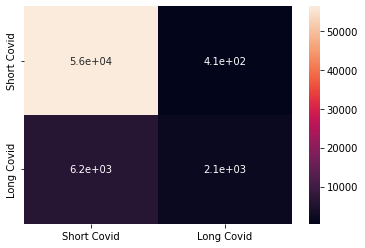

In [49]:
cm = confusion_matrix(test_y, pred)
sns.heatmap(cm, annot = True, xticklabels=["Short Covid", "Long Covid"], yticklabels=["Short Covid", "Long Covid"])

# Logistic Regression

In [50]:
lr = LogisticRegression()

In [51]:
lr.fit(train_X, train_y)

LogisticRegression()

In [52]:
pred2 = lr.predict(test_X)

In [53]:
print(classification_report(test_y, pred2))

              precision    recall  f1-score   support

         0.0       0.90      0.99      0.94     56757
         1.0       0.84      0.23      0.36      8372

    accuracy                           0.89     65129
   macro avg       0.87      0.61      0.65     65129
weighted avg       0.89      0.89      0.87     65129



<AxesSubplot:>

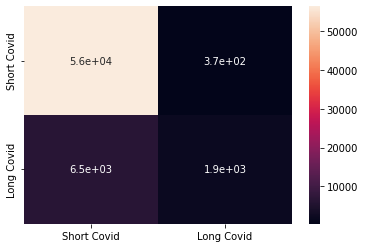

In [54]:
cm = confusion_matrix(test_y, pred2)
sns.heatmap(cm, annot = True, xticklabels=["Short Covid", "Long Covid"], yticklabels=["Short Covid", "Long Covid"])

# KNN


In [55]:
knn = KNN(n_neighbors=2)

In [56]:
knn.fit(train_X, train_y)

KNeighborsClassifier(n_neighbors=2)

In [57]:
pred3 = knn.predict(test_X)

C:\Users\ushou\Downloads\Data Science and AI\MSc Project\project_env\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [58]:
print(classification_report(test_y, pred3))

              precision    recall  f1-score   support

         0.0       0.90      0.99      0.94     56757
         1.0       0.85      0.22      0.34      8372

    accuracy                           0.89     65129
   macro avg       0.87      0.60      0.64     65129
weighted avg       0.89      0.89      0.87     65129



<AxesSubplot:>

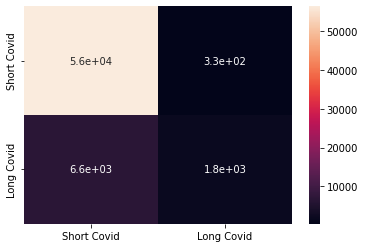

In [59]:
cm = confusion_matrix(test_y, pred3)
sns.heatmap(cm, annot = True, xticklabels=["Short Covid", "Long Covid"], yticklabels=["Short Covid", "Long Covid"])

# Perceptron

In [60]:
perceptron = Perceptron(tol=1e-3, random_state=0)

In [61]:
perceptron.fit(train_X, train_y)

Perceptron()

In [62]:
perceptron.score(test_X, test_y)

0.8885289195289349

In [63]:
pred4 = perceptron.predict(test_X)

In [64]:
print(classification_report(test_y, pred4))

              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94     56757
         1.0       0.84      0.16      0.27      8372

    accuracy                           0.89     65129
   macro avg       0.87      0.58      0.61     65129
weighted avg       0.88      0.89      0.85     65129



<AxesSubplot:>

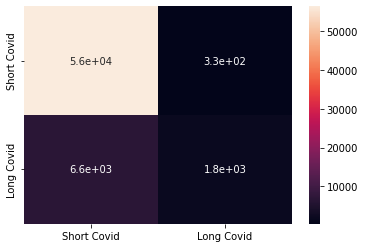

In [65]:
cm = confusion_matrix(test_y, pred3)
sns.heatmap(cm, annot = True, xticklabels=["Short Covid", "Long Covid"], yticklabels=["Short Covid", "Long Covid"])